Problem Statement 2 CNN MNSIT

# Importing Necssary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Input, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# a. Loading and preprocessing the image data

In [2]:
train=pd.read_csv("mnist_train.csv")
test=pd.read_csv("mnist_test.csv")
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train=train.drop(['label'],axis=1).values
y_train=train['label'].values

In [4]:
x_train=x_train/255.0
x_train=x_train.reshape((60000,28,28,1))

In [5]:
x_test=test.drop(['label'],axis=1).values
y_test=test['label'].values

In [6]:
x_test=x_test/255.0

In [7]:
x_test=x_test.reshape((10000,28,28,1))

# b. Defining the model's architecture

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3) , activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

sgd = SGD(learning_rate=0.1,momentum=0.9,nesterov=0.1)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 batch_normalization_1 (Bat  (None, 9216)             

# c. Training the model

In [9]:
history=model.fit(x_train,y_train,validation_split=0.2,epochs=11,batch_size=215)

Epoch 1/11


224/224 [==============================] - 32s 136ms/step - loss: 0.6519 - accuracy: 0.9094 - val_loss: 1.0709 - val_accuracy: 0.6986
Epoch 2/11
224/224 [==============================] - 30s 136ms/step - loss: 0.1069 - accuracy: 0.9704 - val_loss: 0.1035 - val_accuracy: 0.9753
Epoch 3/11
224/224 [==============================] - 34s 150ms/step - loss: 0.0758 - accuracy: 0.9786 - val_loss: 0.1232 - val_accuracy: 0.9792
Epoch 4/11
224/224 [==============================] - 41s 184ms/step - loss: 0.0590 - accuracy: 0.9837 - val_loss: 0.1188 - val_accuracy: 0.9765
Epoch 5/11
224/224 [==============================] - 37s 166ms/step - loss: 0.0518 - accuracy: 0.9852 - val_loss: 0.1005 - val_accuracy: 0.9806
Epoch 6/11
224/224 [==============================] - 29s 132ms/step - loss: 0.0471 - accuracy: 0.9861 - val_loss: 0.2915 - val_accuracy: 0.9367
Epoch 7/11
224/224 [==============================] - 29s 130ms/step - loss: 0.0473 - accuracy: 0.9860 - val_loss: 0.2100 - val_

In [10]:
# x_test=x_test.reshape((10000,28,28,1))

# d.Estimating the model's performance

In [62]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0866 - accuracy: 0.9806


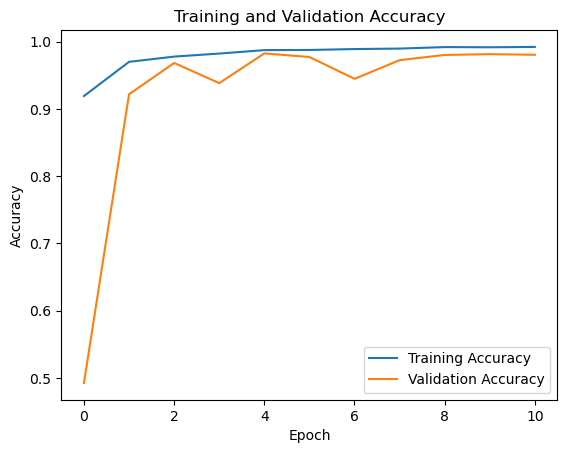

In [63]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


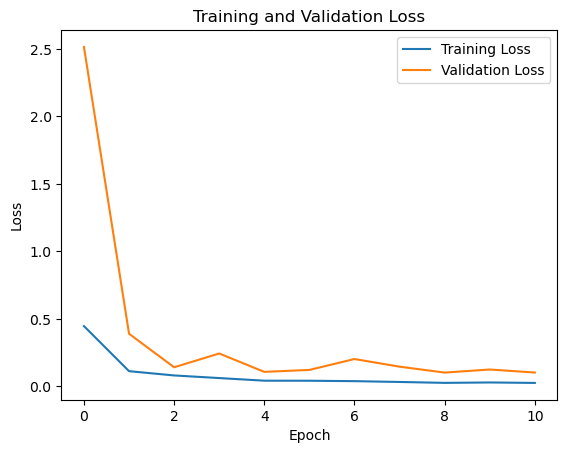

In [64]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [65]:
pred=model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [66]:
print(y_test)
print(np.argmax(pred,axis=1))

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


Predicted Class:
2


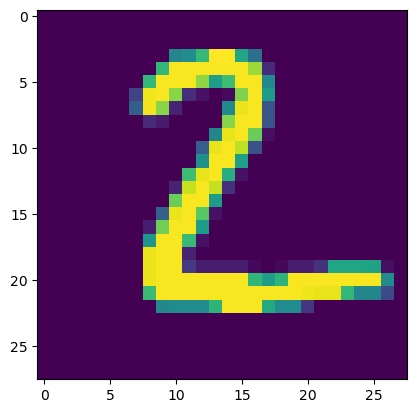

In [67]:
idx=1
plt.imshow(x_test[idx].reshape(28,28))
print("Predicted Class:")
print(pred[idx].argmax())